This is a simple example of creating sequential convolutional neural network model in tensorflow keras and training it to recognize MNIST digits dataset that's today's "Hello World" of image recognition.

Later keras model will be exported to tensorflowjs format. Then it can be used for digit recognition in realtime by drawing digits by hand in web browser.

Import required libraries

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
import os
import tensorflowjs as tfjs

Using TensorFlow backend.


Create Sequential model:

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Print out summary of the model:

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
__________

Import MNIST dataset and to_categorical function

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Init train and test data

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Reshape and normalize data and labels

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Train the model

In [2]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=15, batch_size=128)

NameError: name 'model' is not defined

Save trained model

In [ ]:
model.save('mnist_cnn.h5')

Load and evaluate the model (test the accuracy on test data)

In [7]:
from tensorflow.keras.models import load_model

In [8]:
model = load_model('mnist_cnn.h5')
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 95us/step


Print out the accuracy

In [9]:
test_acc

0.9918

Show example test image:

In [10]:
import matplotlib.pyplot as plt

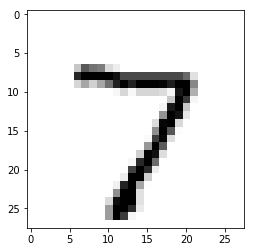

In [11]:
test_img = test_images[0].reshape(28,28)
plt.imshow(test_img, cmap='Greys')

Predict example test image using the model

In [13]:
prediction_probs = model.predict(test_img.reshape(1, 28,28,1)).flatten()

In [14]:
prediction_probs.argmax()

7

This experiment was made after reading Deep Learning with Python by Francois Chollet. I strongly recomment this book to everyone interested in python, deep learning, tensorflow and keras.

<a target="_blank"  href="https://www.amazon.com/gp/product/1617294438/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1617294438&linkCode=as2&tag=sikora507-20&linkId=99dea8b6292cc17dfeb589d5514bc37c"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=1617294438&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=_SL250_&tag=sikora507-20" ></a><img src="//ir-na.amazon-adsystem.com/e/ir?t=sikora507-20&l=am2&o=1&a=1617294438" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />

<a target="_blank" href="https://www.amazon.com/gp/product/1617294438/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1617294438&linkCode=as2&tag=sikora507-20&linkId=7889193ba210dc35fd6c62da47e14df7">Deep Learning with Python</a><img src="//ir-na.amazon-adsystem.com/e/ir?t=sikora507-20&l=am2&o=1&a=1617294438" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />

Export keras model to tensorflow.js format

In [15]:
files = os.listdir('./')
mnist_filename = 'mnist_cnn.h5'
if mnist_filename in files:
    tfjs.converters.save_keras_model(model, './')